# Forward and Inverse Kinematics

### Coordinate Frames and Vectors

** Vector **: a mathematical quantity that has both magnitude and direction.  in coordinate space the magnitude is the length of the line  and the direction is noted as a coordinate from the origin of the reference (start)

** Unit Vectors ** a vector of length 1.  A unit vector is often denoted by a ** lowercase letter with a circumflex ( î )**, or "hat" (pronounced "i-hat"). The term direction vector is used to describe a unit vector being used to represent spatial direction, and such quantities are commonly denoted as d. Two 2D direction vectors, **d1** and **d2** are illustrated. 2D spatial directions represented this way are equivalent numerically to points on the unit circle.



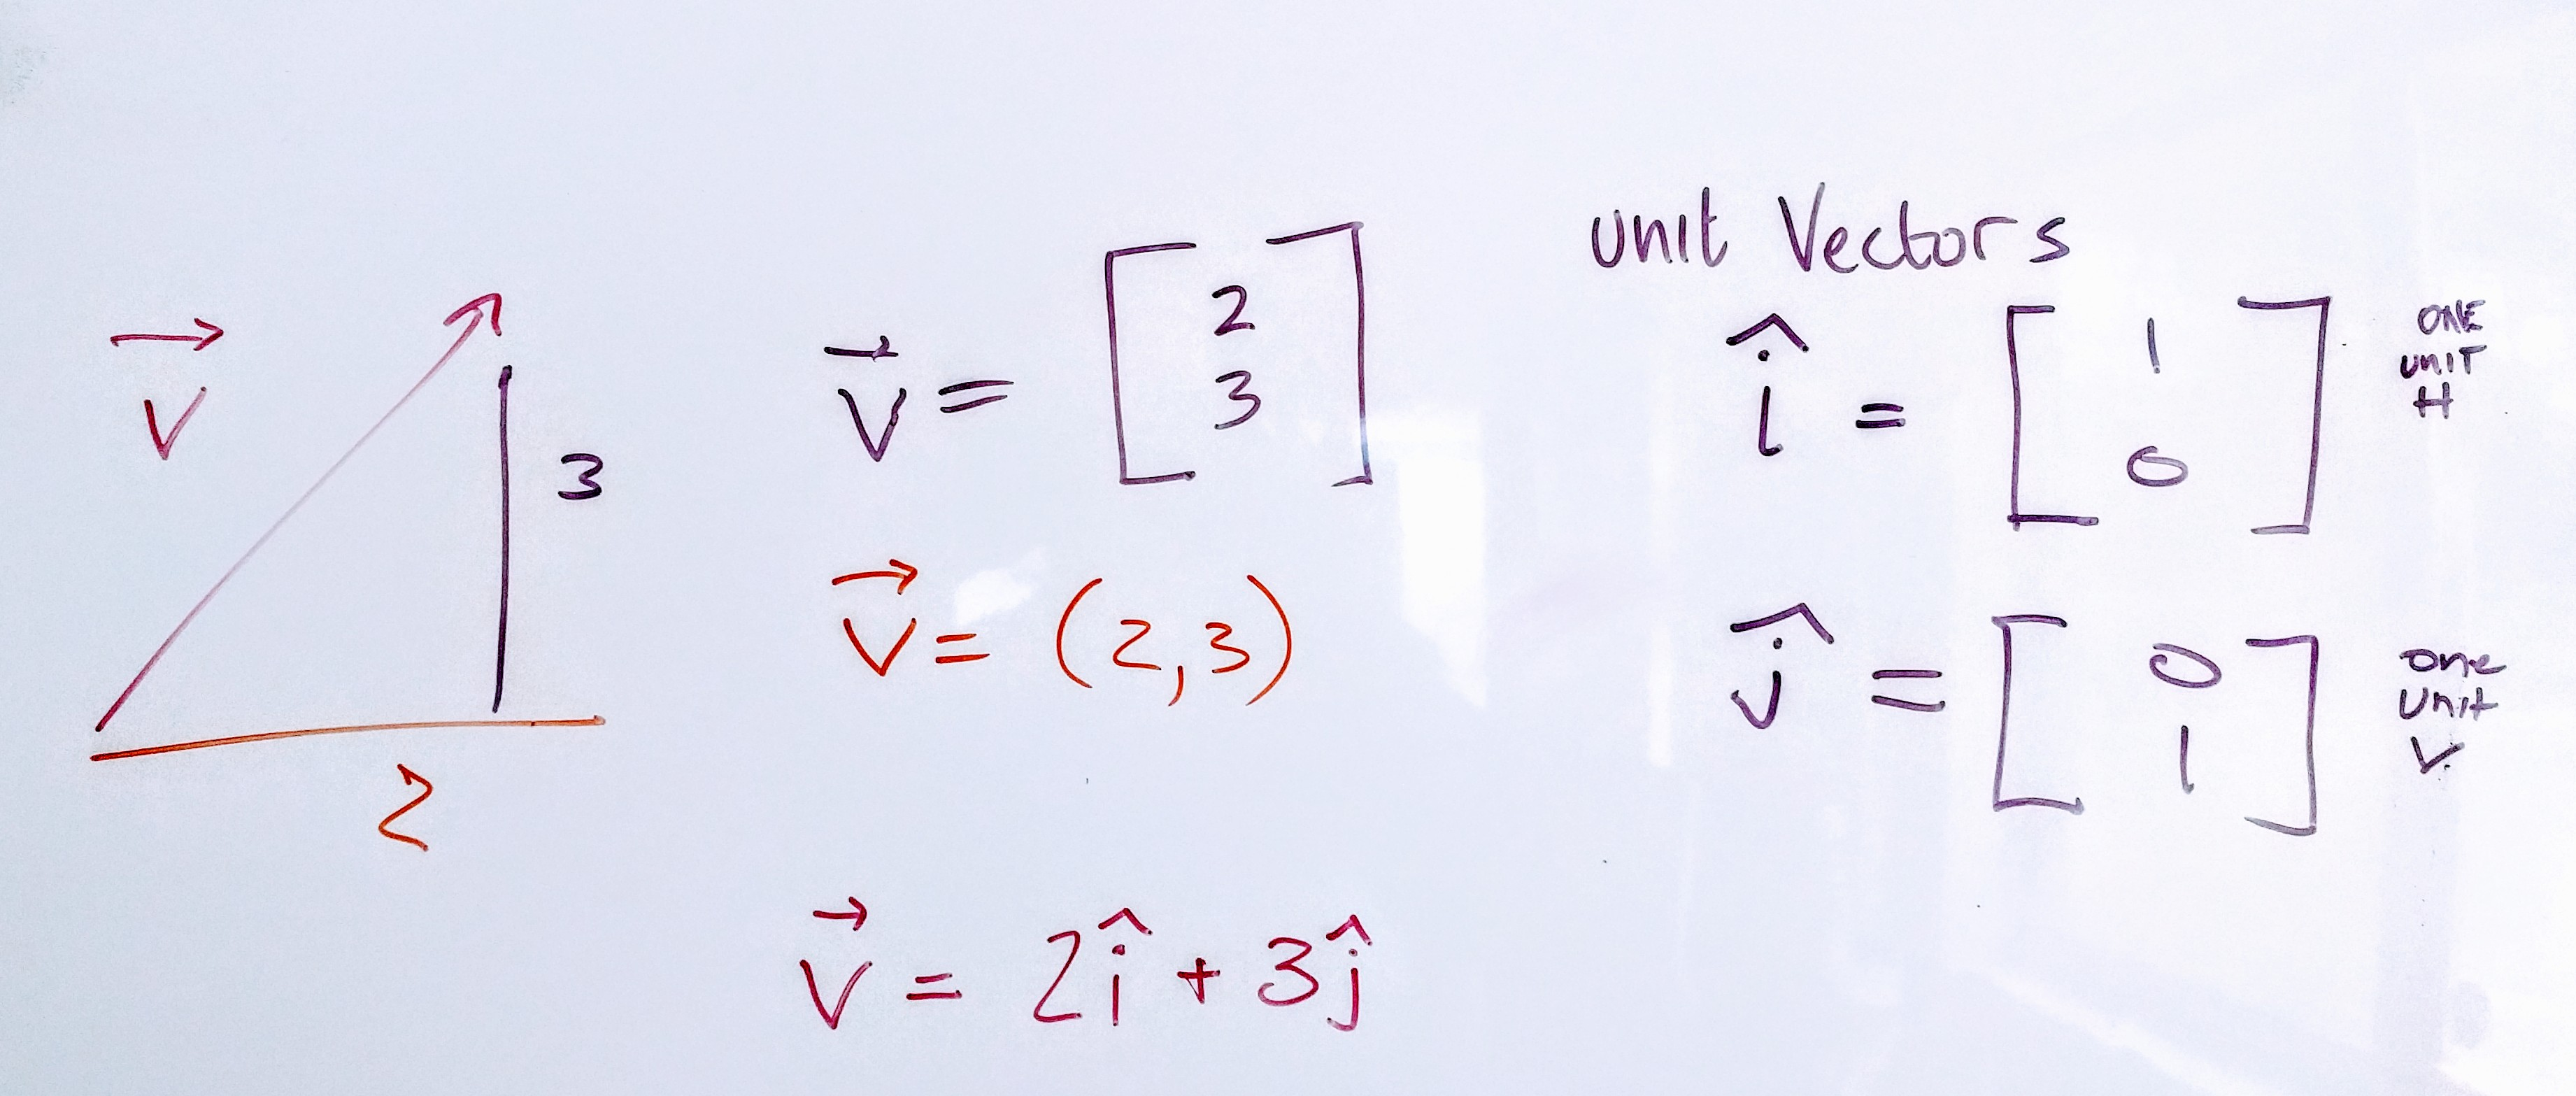

### Rotation Matrices in 2D - or - "Mapping between frames"

Have two conceptual, but mathematically equivalent interpretations. Used as a means of expressing a vector in one coordinate frame in terms of some other coordinate frame. ("Mapping")

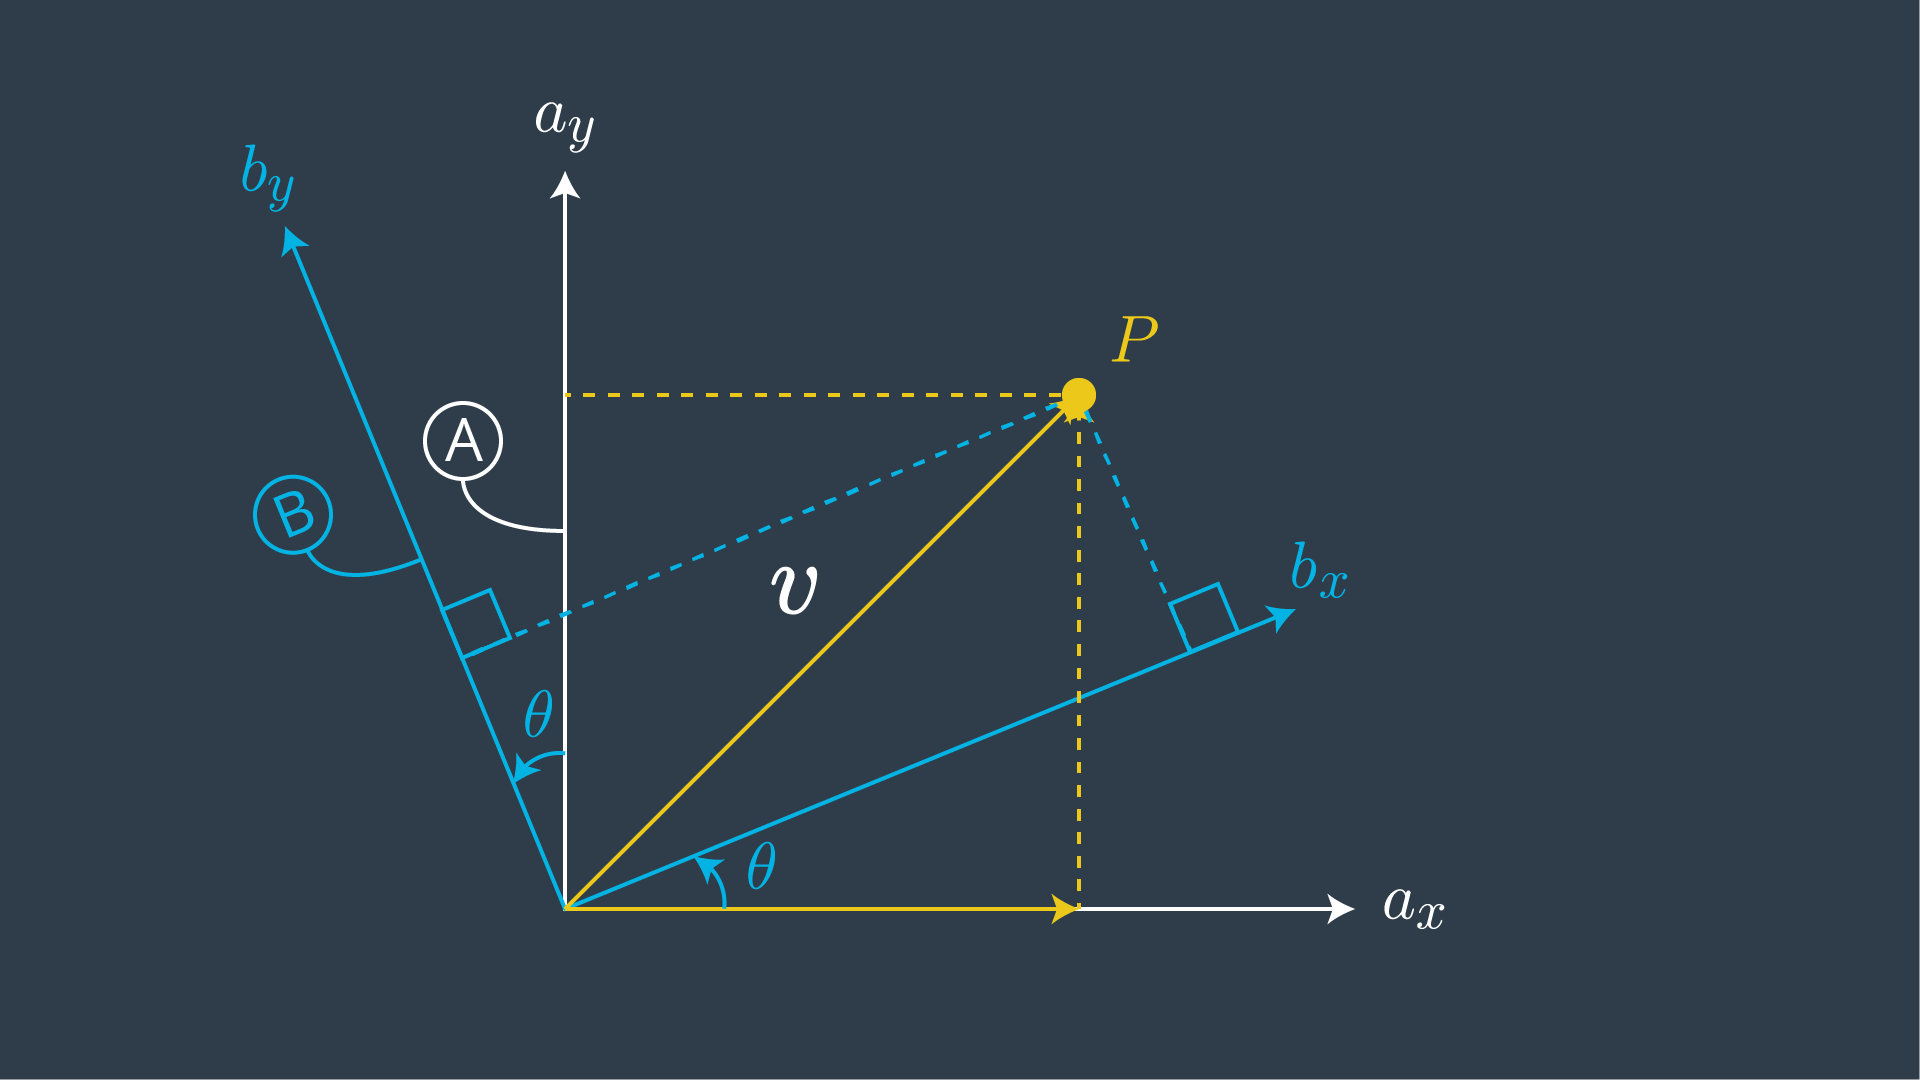


In [1]:
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix
import numpy as np

from sympy import init_printing
init_printing()

In [2]:
### Create symbols for joint variables
q1, q2, q3, q4 = symbols('q1:5') # remember slices do not include the end value 
# unrelated symbols can be defined like this:
A, R, O, C = symbols('A R O C')

In [3]:
# Conversion Factors
rtd = 180./np.pi # radians to degrees
dtr = np.pi/180. # degrees to radians

In [4]:
R_x = Matrix([[ 1,              0,        0],
              [ 0,        cos(q1), -sin(q1)],
              [ 0,        sin(q1),  cos(q1)]])

R_y = Matrix([[ cos(q2),        0,  sin(q2)],
              [       0,        1,        0],
              [-sin(q2),        0,  cos(q2)]])

R_z = Matrix([[ cos(q3), -sin(q3),        0],
              [ sin(q3),  cos(q3),        0],
              [ 0,              0,        1]])


In [13]:
print("Rotation about the X-axis by 45-degrees")
R_x.evalf(subs={q1: 45*dtr})



Rotation about the X-axis by 45-degrees


⎡1.0          0                  0         ⎤
⎢                                          ⎥
⎢ 0   0.707106781186548  -0.707106781186547⎥
⎢                                          ⎥
⎣ 0   0.707106781186547  0.707106781186548 ⎦

In [14]:
print("Rotation about the y-axis by 45-degrees")
R_y.evalf(subs={q2: 45*dtr})

Rotation about the y-axis by 45-degrees


⎡cos(q₁)    0   sin(q₁)⎤
⎢                      ⎥
⎢   0      1.0     0   ⎥
⎢                      ⎥
⎣-sin(q₁)   0   cos(q₁)⎦

In [15]:
print("Rotation about the Z-axis by 30-degrees")
R_z.evalf(subs={q3: 30*dtr})

Rotation about the Z-axis by 30-degrees


⎡cos(q₂)  -sin(q₂)   0 ⎤
⎢                      ⎥
⎢sin(q₂)  cos(q₂)    0 ⎥
⎢                      ⎥
⎣   0        0      1.0⎦

In [16]:
#!/usr/bin/env python
from sympy import symbols, cos, sin, pi, sqrt
from sympy.matrices import Matrix
import numpy as np


### Create symbols for joint variables
q1, q2 = symbols('q1:3')

# Conversion Factors
rtd = 180./np.pi # radians to degrees
dtr = np.pi/180. # degrees to radians

# Create a symbolic matrix representing an intrinsic sequence of rotations 
  # about the Y and then Z axes. Let the rotation about the Y axis be described
  # by q1 and the rotation about Z by q2. 
####### TO DO ########
# Replace R_y and R_z with the appropriate (symbolic) elementary rotation matrices 
  # and then compute YZ_intrinsic. 
R_y = Matrix([[ cos(q1),        0,  sin(q1)],
              [       0,        1,        0],
              [-sin(q1),        0,  cos(q1)]])
              
R_z = Matrix([[ cos(q2), -sin(q2),        0],
              [ sin(q2),  cos(q2),        0],
              [ 0,              0,        1]])

print('YZ_intrinsic_num is...')
YZ_intrinsic_sym = R_y * R_z
YZ_intrinsic_sym


⎡0.353553390593274   -0.612372435695794  0.707106781186547⎤
⎢                                                         ⎥
⎢0.866025403784439          0.5                  0        ⎥
⎢                                                         ⎥
⎣-0.353553390593274  0.612372435695794   0.707106781186548⎦

In [21]:
# Numerically evaluate YZ_intrinsic assuming:
   # q1 = 45 degrees and q2 = 60 degrees. 
   # NOTE: Trigonometric functions in Python assume the input is in radians!  

print('YZ_intrinsic_num is...')
YZ_intrinsic_num = YZ_intrinsic_sym.evalf(subs={q1: 45*dtr, q2: 60*dtr})
YZ_intrinsic_num

⎡0.353553390593274   -0.612372435695794  0.707106781186547⎤
⎢                                                         ⎥
⎢0.866025403784439          0.5                  0        ⎥
⎢                                                         ⎥
⎣-0.353553390593274  0.612372435695794   0.707106781186548⎦

In [17]:
### Create symbols for joint variables
q1, q2 = symbols('q1:3')

# Create a symbolic matrix representing an extrinsic sequence of rotations 
  # about the Z and then Y axes. Let the rotation about the Y axis be described
  # by q1 and the rotation about Z by q2. 
####### TO DO ########
# Replace R_y and R_z with the appropriate (symbolic) elementary rotation matrices and then compute ZY_extrinsic. 
R_y = Matrix([[ cos(q1),        0,  sin(q1)],
              [       0,        1,        0],
              [-sin(q1),        0,  cos(q1)]])
              
R_z = Matrix([[ cos(q2), -sin(q2),        0],
              [ sin(q2),  cos(q2),        0],
              [ 0,              0,        1]])
              
ZY_extrinsic_sym = R_y * R_z
print('Printing ZY_extrinsic_sym')
ZY_extrinsic_sym

Printing ZY_extrinsic_sym


⎡cos(q₁)⋅cos(q₂)   -sin(q₂)⋅cos(q₁)  sin(q₁)⎤
⎢                                           ⎥
⎢    sin(q₂)           cos(q₂)          0   ⎥
⎢                                           ⎥
⎣-sin(q₁)⋅cos(q₂)  sin(q₁)⋅sin(q₂)   cos(q₁)⎦

In [22]:
# Numerically evaluate ZY_extrinsic assuming:
   # q1 = 45 degrees and q2 = 60 degrees. 
   # NOTE: Trigonometric functions in Python assume the input is in radians!  
print('Printing ZY_extrinsic_num')
ZY_extrinsic_num = ZY_extrinsic_sym.evalf( subs={ q1:pi/4, q2: pi/3 })
ZY_extrinsic_num

Printing ZY_extrinsic_num


⎡0.353553390593274   -0.612372435695794  0.707106781186548⎤
⎢                                                         ⎥
⎢0.866025403784439          0.5                  0        ⎥
⎢                                                         ⎥
⎣-0.353553390593274  0.612372435695794   0.707106781186548⎦

## Euler Angles from a Rotation Matrix

In many cases, particularly involving inverse kinematics, we are given a composite rotation matrix and it is necessary to find a set of Euler Angles that would produce this rotation. The specific solution depends on the choice of Euler Angles but the basic procedure is the same. We illustrate the general procedure with an example.

Consider the extrinsic (i.e., fixed axis) X-Y-Z rotation sequence. The composite rotation matrix is,

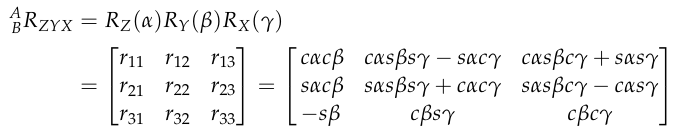

The goal is to find the angles alpha, beta, and gamma, given that numerical values for r
​ij
​​  are known. The solution is to use various combinations of r
​ij
​​  so that each angle can be individually isolated and solved explicitly. Using the simplest terms possible seems to be a prudent strategy. Although beta appears in isolation in element r
​31
​​ , it is not a good idea to solve for angles using the inverse of the sine or cosine functions. The reason is the ambiguity in sign: if -sin(beta) = 0.5, in which quadrant is the angle? This type of ambiguity is avoided by using the atan2 function.The syntax depends on the language or library used, but is often: atan2(y, x).

Thus, it is possible to find beta, by recognizing,

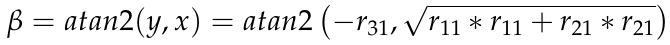

A similar trick is used to find gamma, 

and also alpha, 

What happens then when cos(beta) = 0, that is, when beta = +/-90 degrees? At this point, atan2 is undefined and, as we saw with Euler Angles, the system exhibits a singularity of representation.


### Calculate the Euler angles that produces a rotation equivalent to R

In [31]:
#!/usr/bin/env python
import numpy as np
from sympy.matrices import Matrix
from sympy import symbols, atan2, sqrt


# Fixed Axis X-Y-Z Rotation Matrix
R_XYZ = Matrix([[ 0.353553390593274, -0.306186217847897, 0.883883476483184],
            [ 0.353553390593274,  0.918558653543692, 0.176776695296637],
            [-0.866025403784439,               0.25, 0.433012701892219]])

#get identities
R11 = R_XYZ[0,0]
R21 = R_XYZ[1,0]
R31 = R_XYZ[2,0]
R32 = R_XYZ[2,1]
R33 = R_XYZ[2,2]


######## TO DO ##########
# Calculate the Euler angles that produces a rotation equivalent to R (above)
# NOTE: Be sure your answer has units of DEGREES!
alpha = atan2(R21,R11) * rtd # rotation about Z-axis
beta  = atan2(-R31,sqrt(R11*R11 + R21 * R21)) * rtd # rotation about Y-axis
gamma = atan2(R32,R33) * rtd # rotation about X-axis

#R_XYZ
#R31
alpha

